In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Ensure inline plots (for Jupyter)
%matplotlib inline

# Optional: Improve plot styles
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


In [6]:
df = pd.read_csv("/home/yogesh/genai/stock price prediction/notebook/preprocessed_stock_data.csv")


In [7]:
df.head()

,Open,High,Low,Close,Volume,year,Month,Day
0,0.121875,0.125000,0.096354,0.097917,1443120000,1997,5,15
1,0.098438,0.098958,0.085417,0.086458,294000000,1997,5,16
2,0.088021,0.088542,0.081250,0.085417,122136000,1997,5,19
3,0.086458,0.087500,0.081771,0.081771,109344000,1997,5,20
4,0.081771,0.082292,0.068750,0.071354,377064000,1997,5,21


In [8]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'year', 'Month', 'Day'], dtype='object')

In [9]:
# Data Info
print(df.info())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Descriptive statistics
print("\nDescriptive Statistics:\n", df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7101 entries, 0 to 7100
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    7101 non-null   float64
 1   High    7101 non-null   float64
 2   Low     7101 non-null   float64
 3   Close   7101 non-null   float64
 4   Volume  7101 non-null   int64  
 5   year    7101 non-null   int64  
 6   Month   7101 non-null   int64  
 7   Day     7101 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 443.9 KB
None

Missing Values:
 Open      0
High      0
Low       0
Close     0
Volume    0
year      0
Month     0
Day       0
dtype: int64

Descriptive Statistics:
               Open         High          Low        Close        Volume  \
count  7101.000000  7101.000000  7101.000000  7101.000000  7.101000e+03   
mean     43.324779    43.834319    42.773290    43.318719  1.346430e+08   
std      61.282168    61.974621    60.524627    61.266472  1.369374e+08   
min       0.07

Correlation Heatmap

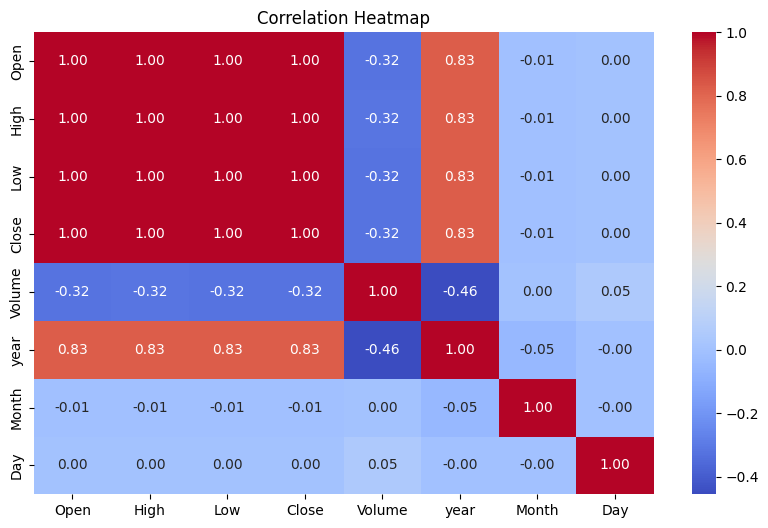

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


 Line Plot of Closing Prices Over Time

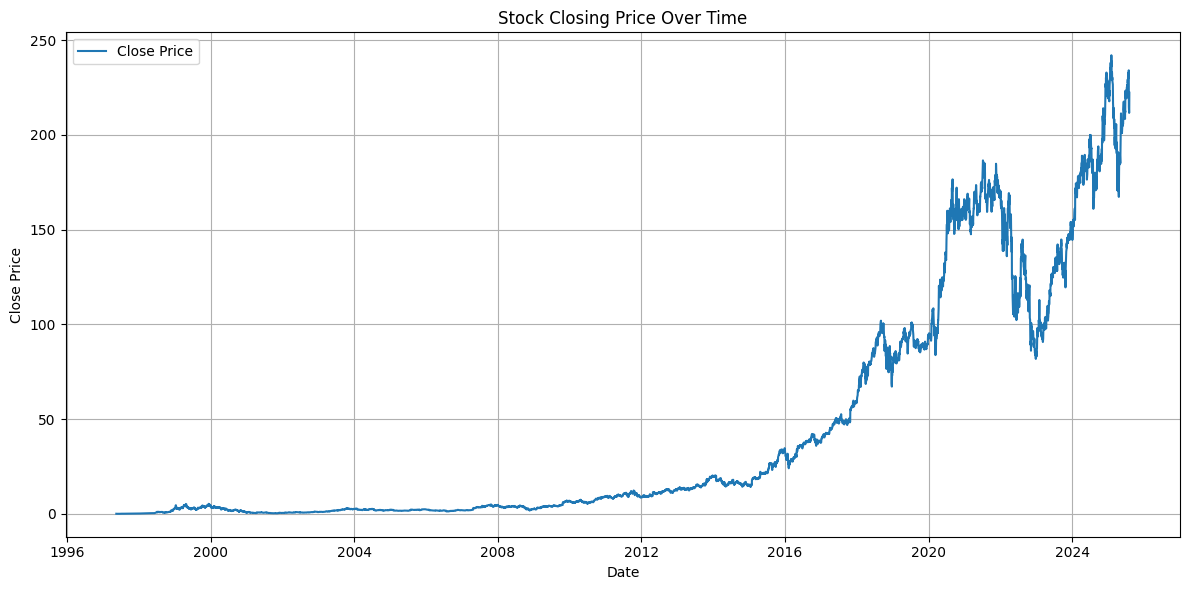

In [12]:
# Create a datetime column
df['Date'] = pd.to_datetime(df[['year', 'Month', 'Day']])
df_sorted = df.sort_values(by='Date')

plt.figure(figsize=(12, 6))
plt.plot(df_sorted['Date'], df_sorted['Close'], label='Close Price')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Closing Price Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Volume vs Close Scatter Plot

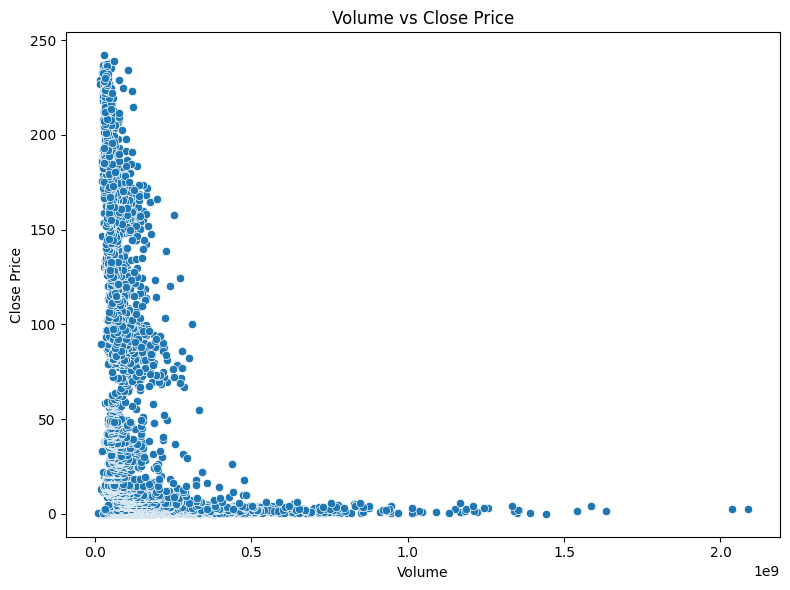

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Volume', y='Close', data=df)
plt.title('Volume vs Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.tight_layout()
plt.show()


 Line Plot — Daily Stock Prices (Low, High, Close)

In [15]:
def plot_price_trend(df):
    plt.figure(figsize=(14,6))
    plt.plot(df.index, df['Low'], label='Low Price', alpha=0.6)
    plt.plot(df.index, df['High'], label='High Price', alpha=0.6)
    plt.plot(df.index, df['Close'], label='Close Price', linewidth=2)

    plt.title("Daily Stock Prices: Low vs High vs Close")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.tight_layout()
    plt.show()


Monthly Average Price Analysis

In [16]:
def plot_monthly_avg(df):
    monthly_avg = df.groupby('Month')[['Open', 'High', 'Low', 'Close']].mean()
    monthly_avg.index = [calendar.month_abbr[m] for m in monthly_avg.index]

    plt.figure(figsize=(14,6))
    monthly_avg.plot(kind='bar', figsize=(14,6))
    plt.title("Average Monthly Prices (Open, High, Low, Close)")
    plt.ylabel("Average Price")
    plt.xlabel("Month")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Volume Analysis (Distribution + Trend)

In [17]:
def volume_distribution(df):
    plt.figure(figsize=(12,5))
    sns.histplot(df['Volume'], kde=True, bins=30)
    plt.title("Volume Distribution")
    plt.xlabel("Volume")
    plt.ylabel("Frequency")
    plt.show()

def volume_trend(df):
    plt.figure(figsize=(14,5))
    plt.plot(df.index, df['Volume'], label="Volume", color="orange")
    plt.title("Volume Over Time")
    plt.ylabel("Volume")
    plt.xlabel("Date")
    plt.tight_layout()
    plt.show()


Daily Price Range (High - Low)

In [18]:
def plot_daily_range(df):
    df['Range'] = df['High'] - df['Low']

    plt.figure(figsize=(14,5))
    plt.plot(df.index, df['Range'], color='purple')
    plt.title("Daily Price Range (High - Low)")
    plt.xlabel("Date")
    plt.ylabel("Price Range")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Correlation Heatmap

In [19]:
def correlation_heatmap(df):
    plt.figure(figsize=(10,6))
    corr = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()


Boxplots for Outlier Detection by Month

In [20]:
def monthly_boxplots(df):
    df['Month_Name'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
    plt.figure(figsize=(14,6))
    sns.boxplot(data=df, x='Month_Name', y='Close', palette='Set2')
    plt.title("Monthly Close Price Distribution (Boxplot)")
    plt.xlabel("Month")
    plt.ylabel("Close Price")
    plt.tight_layout()
    plt.show()


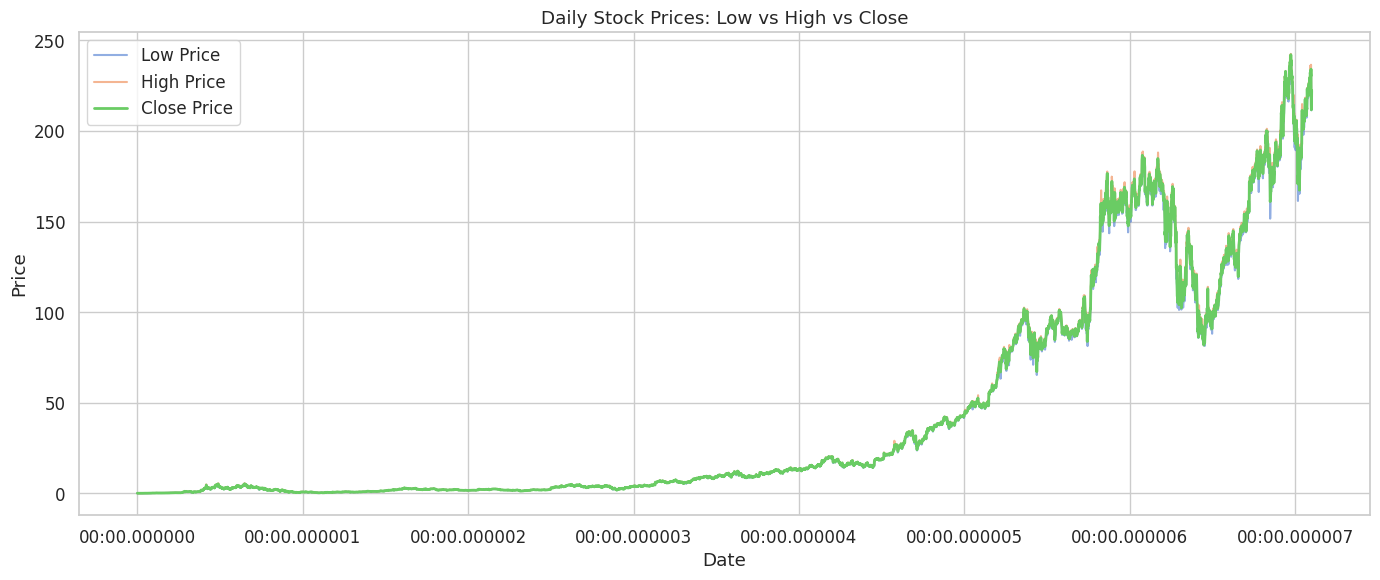

<Figure size 1400x600 with 0 Axes>

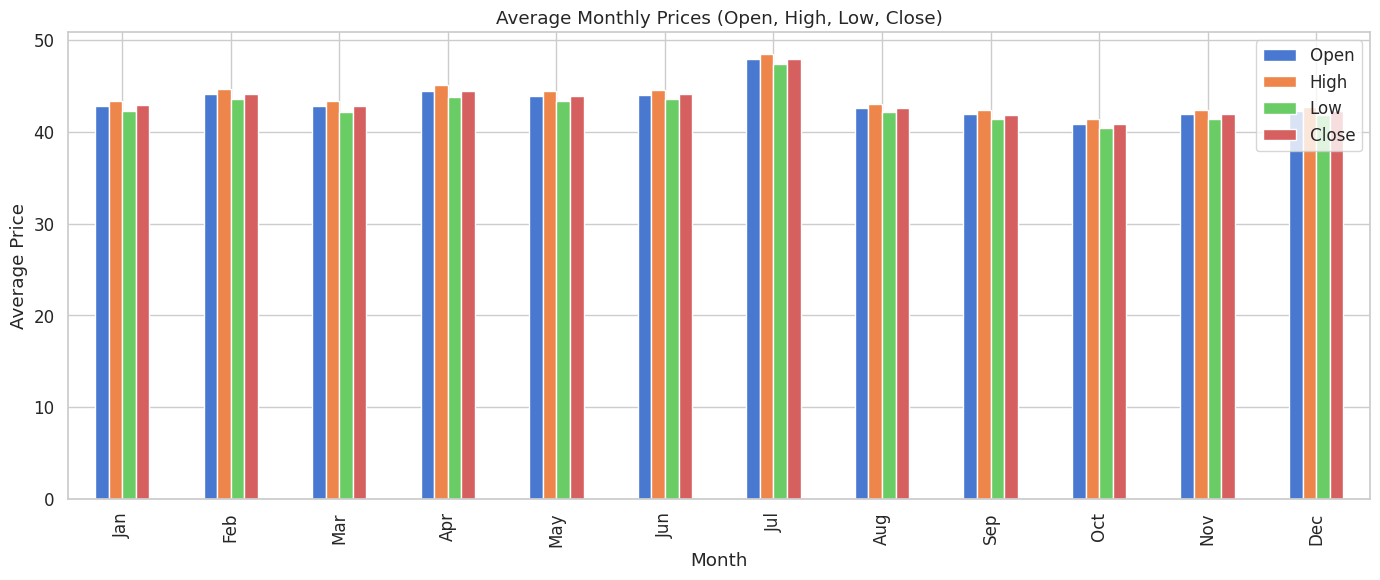

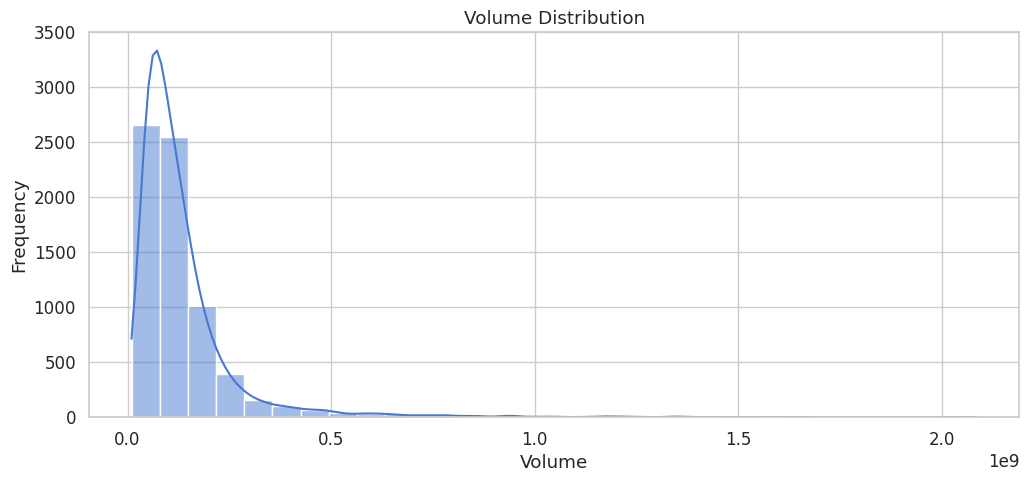

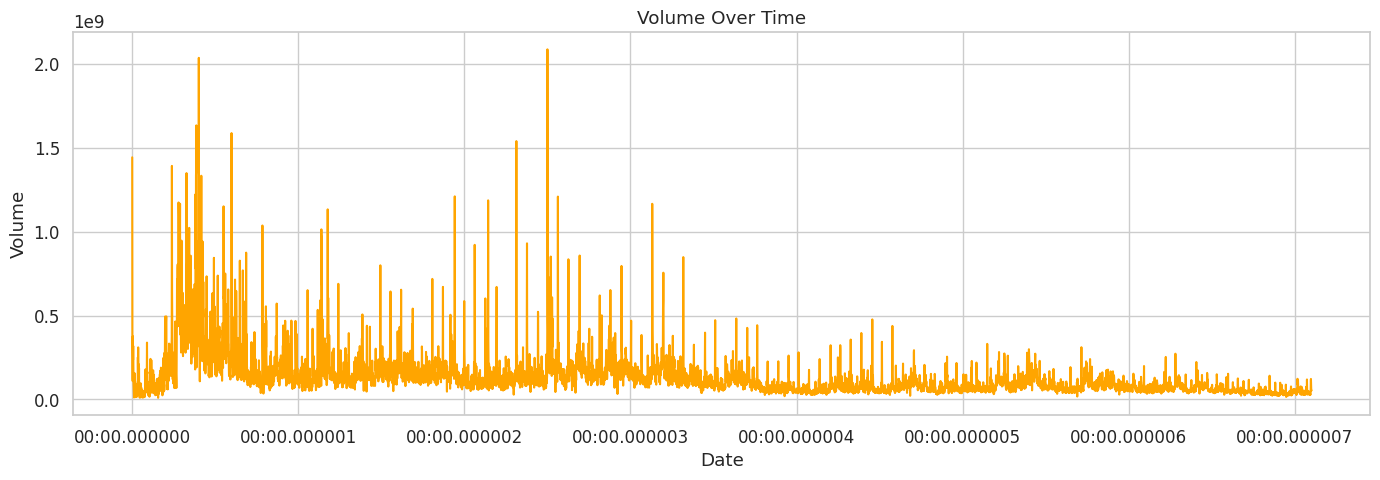

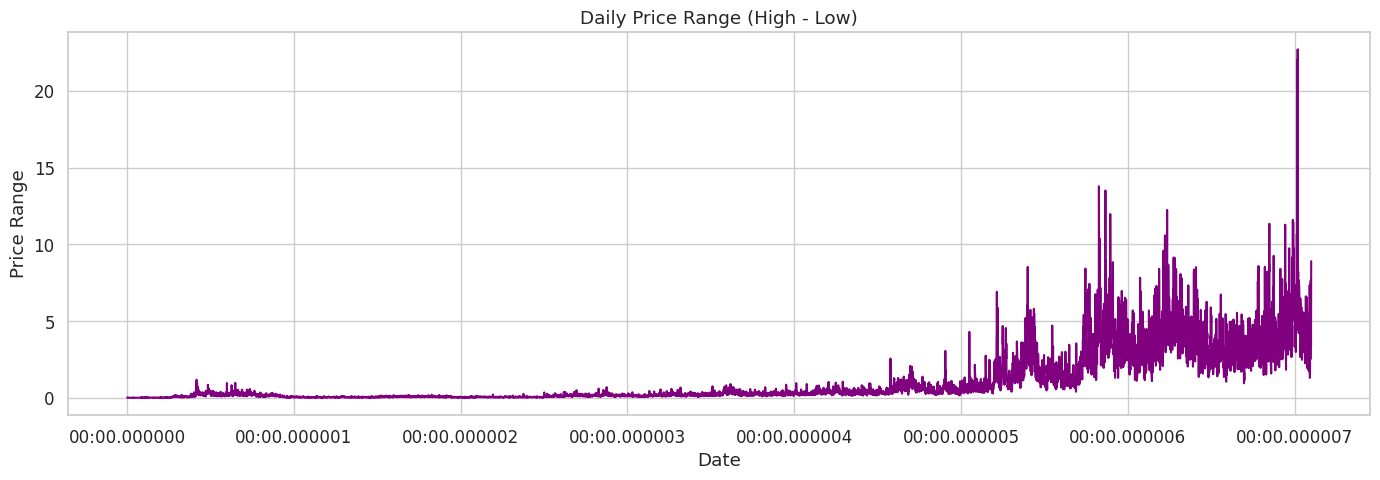

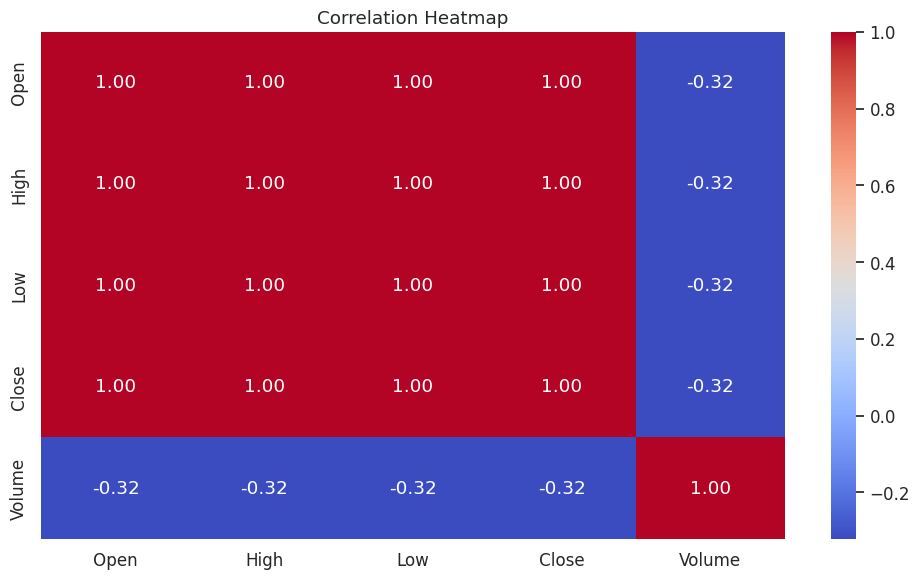

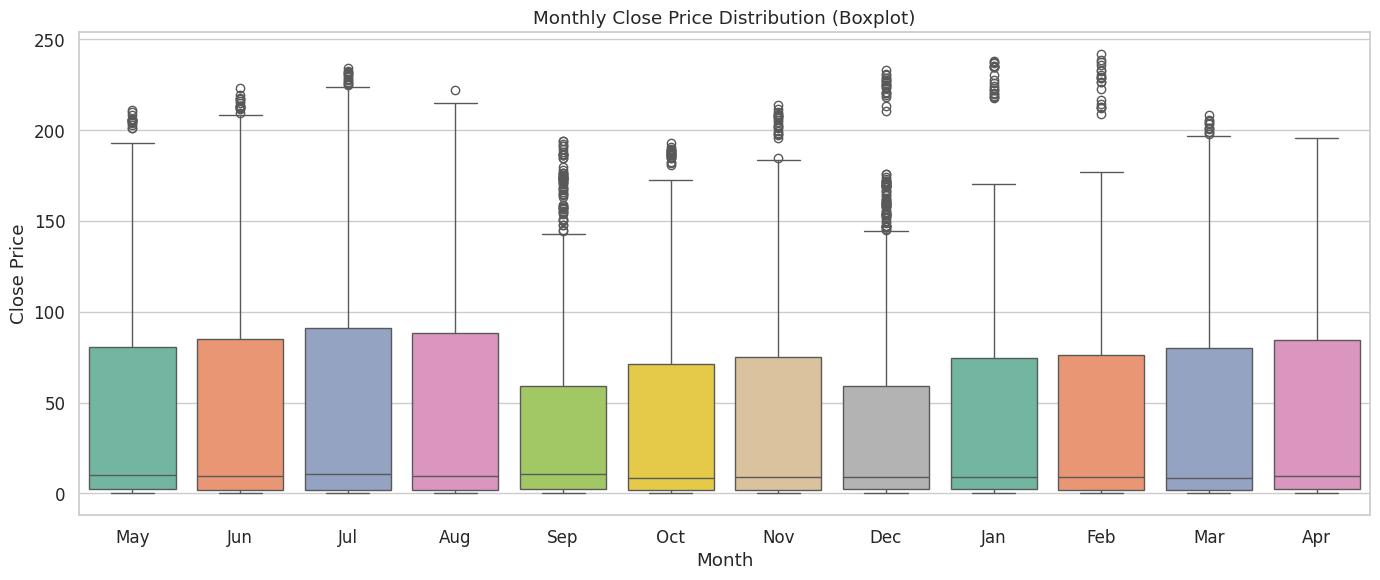

In [21]:
df.index = pd.to_datetime(df.index)  # Ensure datetime index if not set

plot_price_trend(df)
plot_monthly_avg(df)
volume_distribution(df)
volume_trend(df)
plot_daily_range(df)
correlation_heatmap(df)
monthly_boxplots(df)


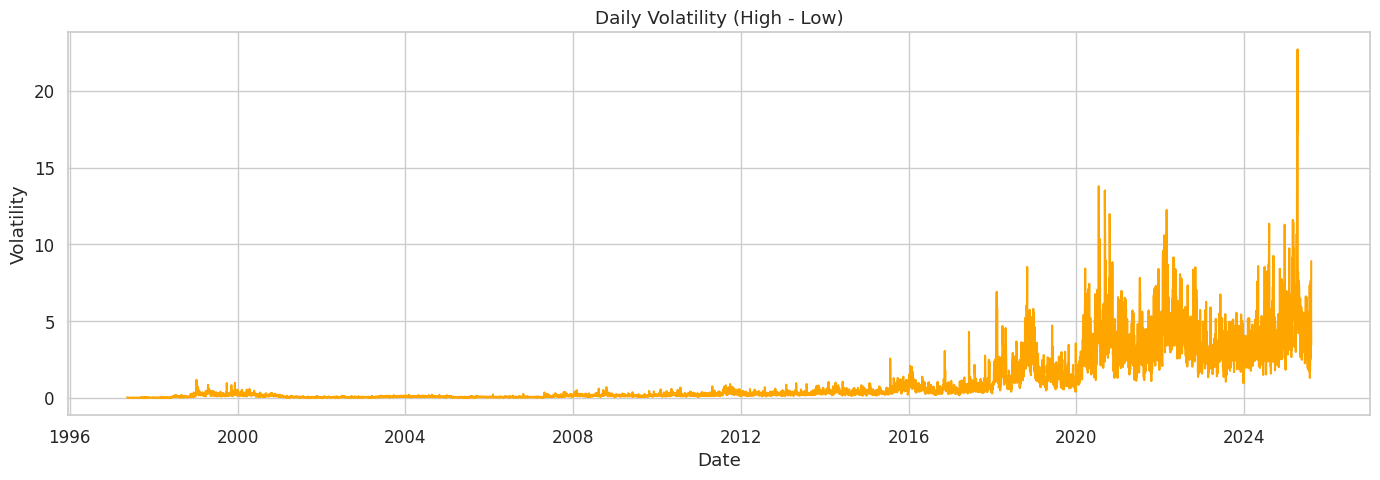

In [23]:
# Add volatility column
df['Volatility'] = df['High'] - df['Low']

plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['Volatility'], color='orange')
plt.title("Daily Volatility (High - Low)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.tight_layout()
plt.show()


Daily Price Change (Close - Open)

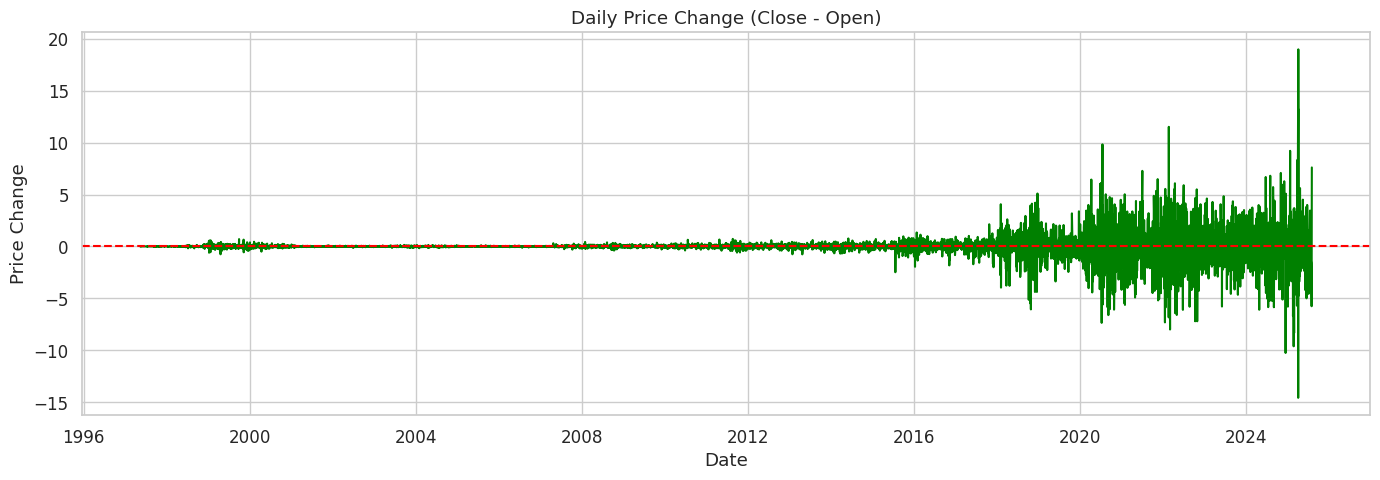

In [24]:
df['Daily Change'] = df['Close'] - df['Open']

plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['Daily Change'], color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title("Daily Price Change (Close - Open)")
plt.xlabel("Date")
plt.ylabel("Price Change")
plt.tight_layout()
plt.show()


📘 Explanation:

    Positive = closed higher than open → bullish day.

    Negative = bearish day.

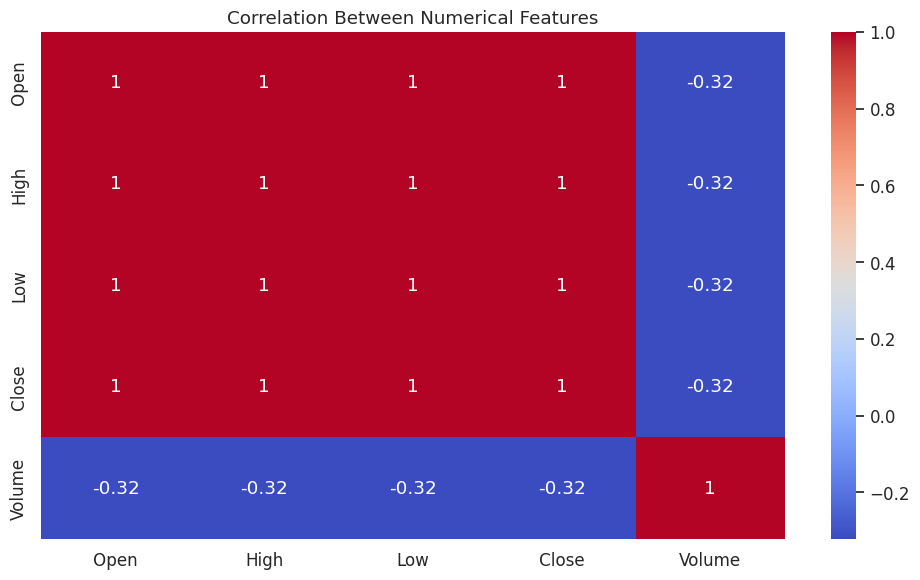

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.tight_layout()
plt.show()


📘 Explanation:

    High correlation between Open/Close/High/Low is expected.

    Useful to detect multicollinearity for modeling.

## Monthly Volume Analysis

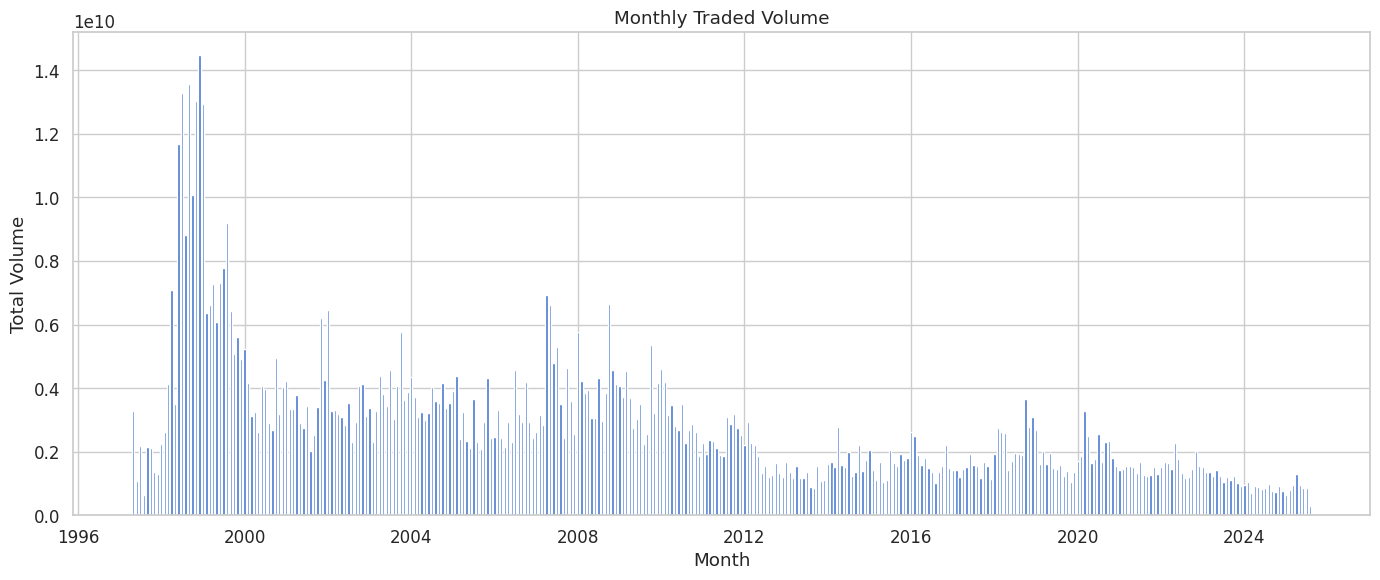

In [26]:
monthly_volume = df.groupby(['year', 'Month'])['Volume'].sum().reset_index()
monthly_volume['Date'] = pd.to_datetime(monthly_volume[['year', 'Month']].assign(DAY=1))

plt.figure(figsize=(14,6))
plt.bar(monthly_volume['Date'], monthly_volume['Volume'], width=20)
plt.title("Monthly Traded Volume")
plt.xlabel("Month")
plt.ylabel("Total Volume")
plt.tight_layout()
plt.show()


 Explanation:

    Helps understand trading activity trends.

    Higher volume may indicate stronger interest or volatility.

## Yearly Average Trends: Open, Close, High, Low

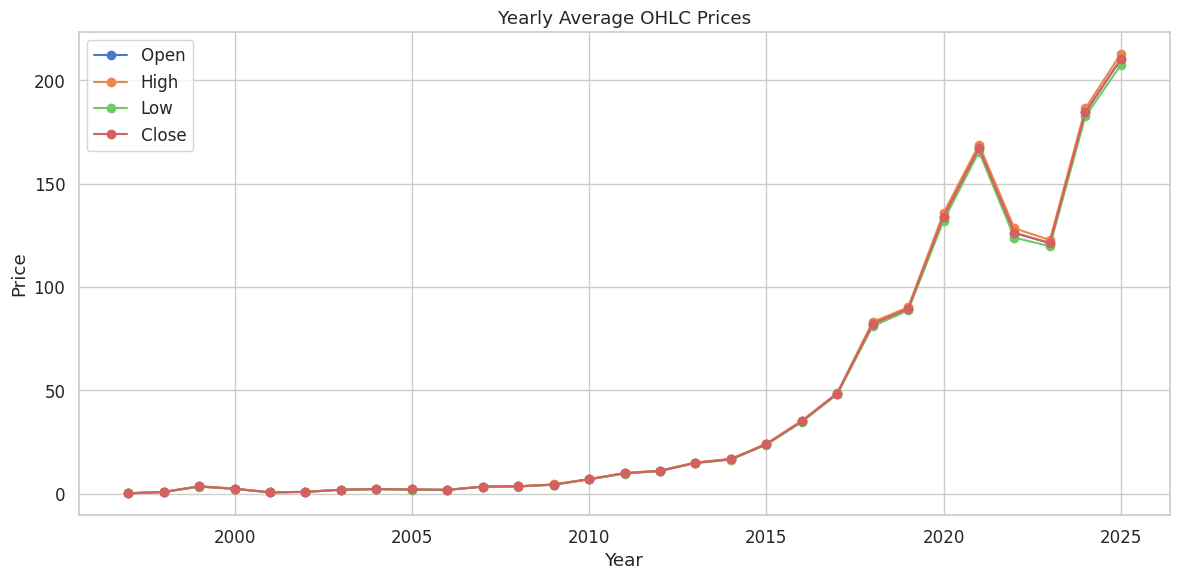

In [29]:
# Yearly average of OHLC prices
yearly_avg = df.groupby('year')[['Open', 'High', 'Low', 'Close']].mean()

plt.figure(figsize=(12,6))
for col in ['Open', 'High', 'Low', 'Close']:
    plt.plot(yearly_avg.index, yearly_avg[col], marker='o', label=col)

plt.title("Yearly Average OHLC Prices")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Helps to understand long-term market movement. If 'Close' is consistently rising, it indicates a growing stock.

## Monthly Trend Across All Years

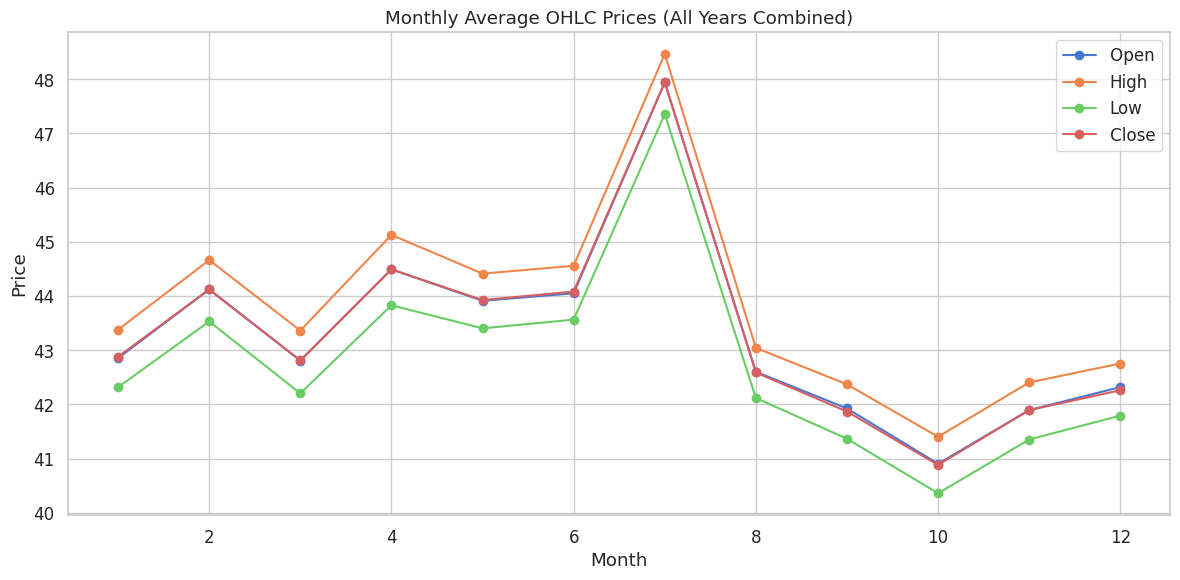

In [30]:
# Monthly average across all years
monthly_avg = df.groupby('Month')[['Open', 'High', 'Low', 'Close']].mean()

monthly_avg.plot(figsize=(12,6), marker='o')
plt.title("Monthly Average OHLC Prices (All Years Combined)")
plt.xlabel("Month")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()


## Volume Trend Over Years

Reveals seasonal patterns or monthly volatility, useful for cyclical industries.

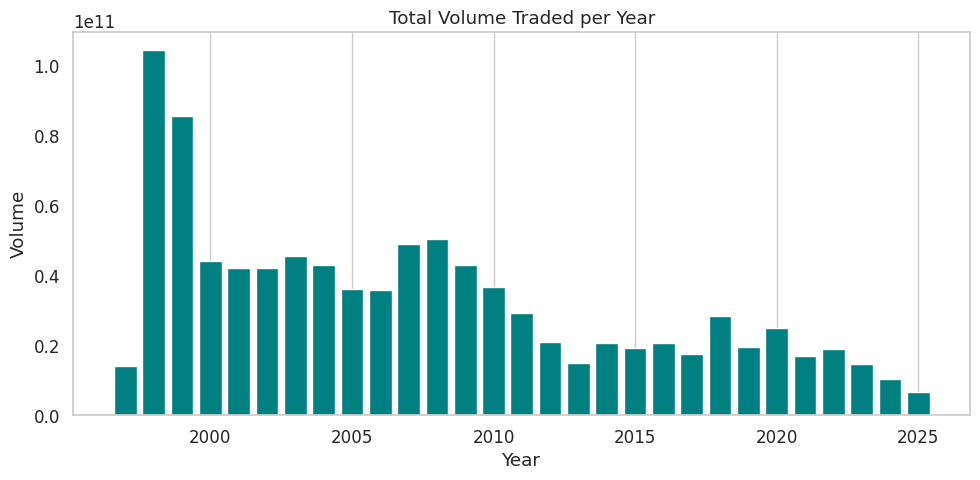

In [31]:
# Yearly total traded volume
yearly_volume = df.groupby('year')['Volume'].sum()

plt.figure(figsize=(10,5))
plt.bar(yearly_volume.index, yearly_volume.values, color='teal')
plt.title("Total Volume Traded per Year")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


A sudden spike or drop in volume may signal market sentiment change, news impact, or institutional interest.

## Monthly Volume Trend for a Particular Year (e.g., 2022)

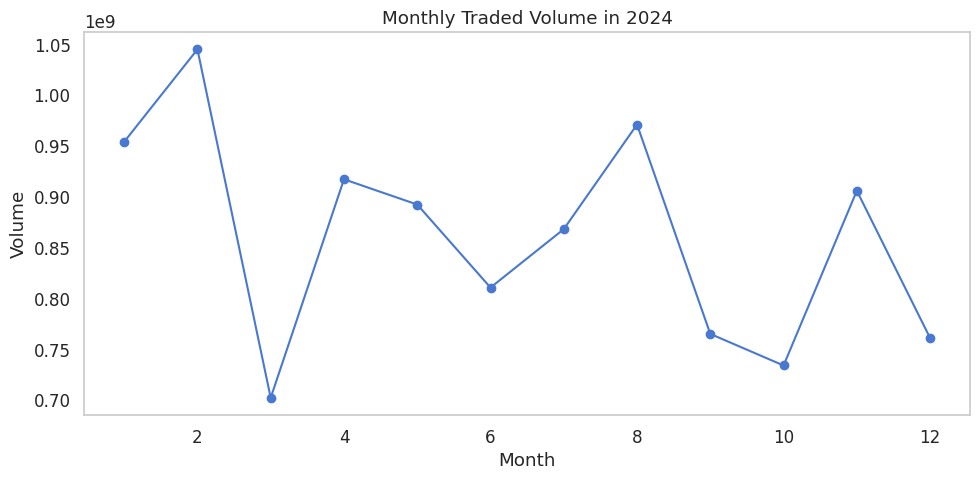

In [34]:
# Monthly volume in a specific year
year_filter = 2024
monthly_volume = df[df['year'] == year_filter].groupby('Month')['Volume'].sum()

plt.figure(figsize=(10,5))
plt.plot(monthly_volume.index, monthly_volume.values, marker='o')
plt.title(f"Monthly Traded Volume in {year_filter}")
plt.xlabel("Month")
plt.ylabel("Volume")
plt.grid()
plt.tight_layout()
plt.show()


## Volatility Chart: (High - Low) Daily Spread per Year

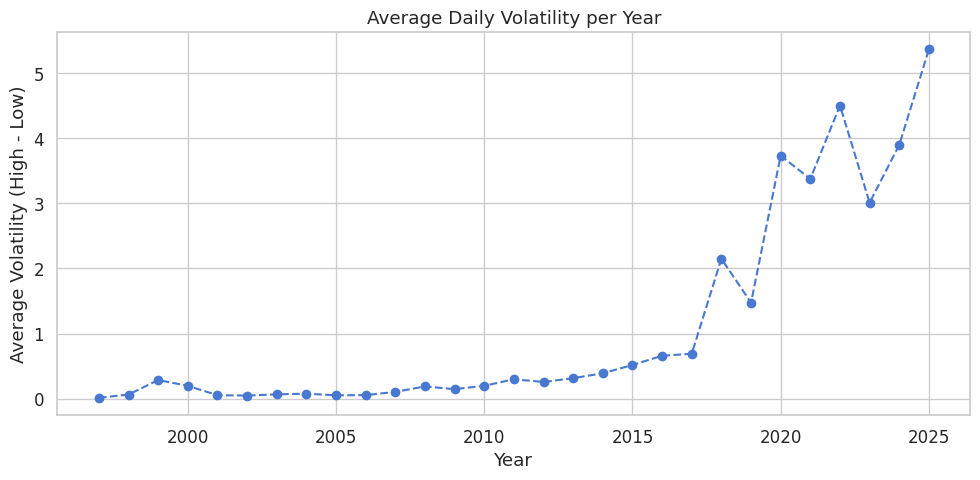

In [35]:
# Create a new column for daily volatility
df['Volatility'] = df['High'] - df['Low']

# Average yearly volatility
volatility_by_year = df.groupby('year')['Volatility'].mean()

plt.figure(figsize=(10,5))
plt.plot(volatility_by_year.index, volatility_by_year.values, marker='o', linestyle='--')
plt.title("Average Daily Volatility per Year")
plt.xlabel("Year")
plt.ylabel("Average Volatility (High - Low)")
plt.grid(True)
plt.tight_layout()
plt.show()


Candle-Type Days Count: Bullish vs Bearish per Year

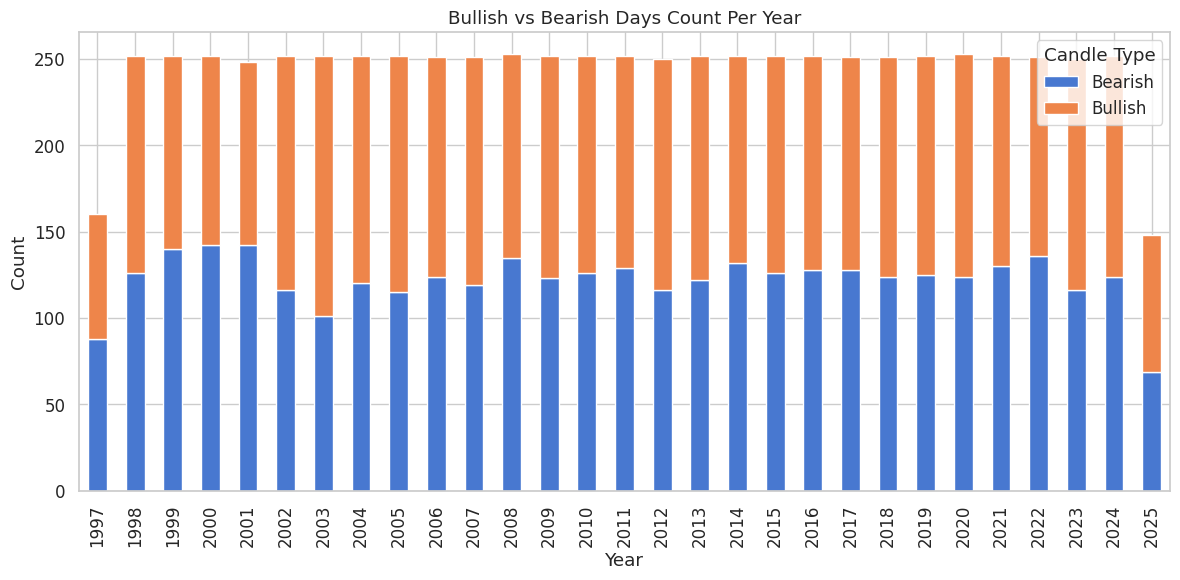

In [36]:
# Bullish = Close > Open, Bearish = Close < Open
df['Candle'] = df.apply(lambda row: 'Bullish' if row['Close'] > row['Open'] else 'Bearish', axis=1)

bull_bear_count = df.groupby(['year', 'Candle']).size().unstack().fillna(0)

bull_bear_count.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Bullish vs Bearish Days Count Per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title='Candle Type')
plt.tight_layout()
plt.show()


Shows market sentiment per year. Bullish years have more "Close > Open" days.

## Monthly Boxplot of Close Prices for a Given Year

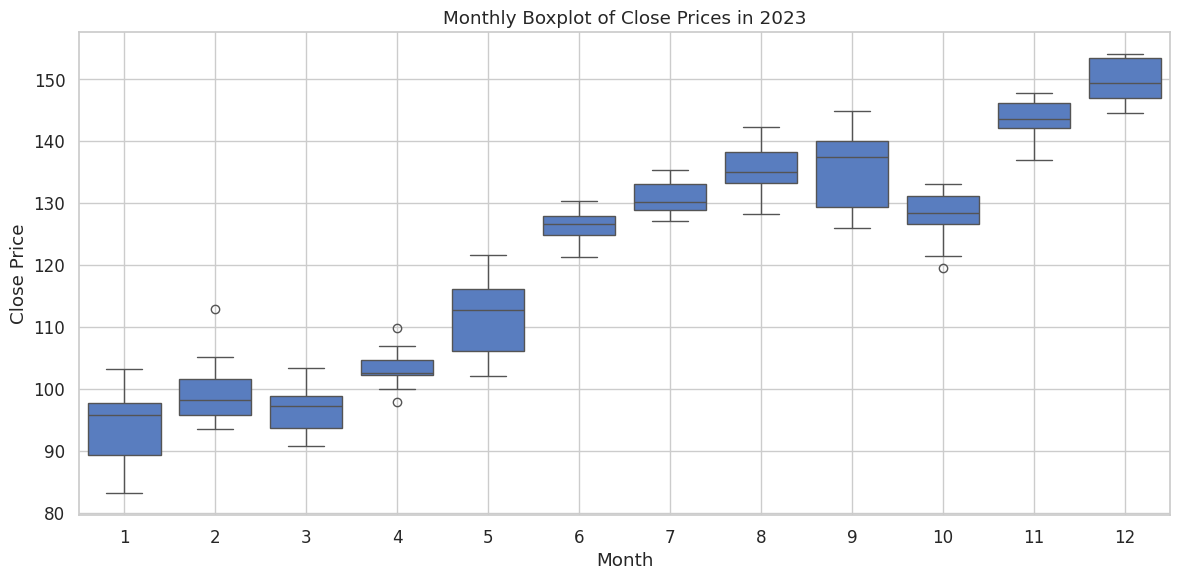

In [37]:
import seaborn as sns

selected_year = 2023
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='Close', data=df[df['year'] == selected_year])
plt.title(f"Monthly Boxplot of Close Prices in {selected_year}")
plt.xlabel("Month")
plt.ylabel("Close Price")
plt.grid(True)
plt.tight_layout()
plt.show()


## Daily Close Price Trend for a Specific Year

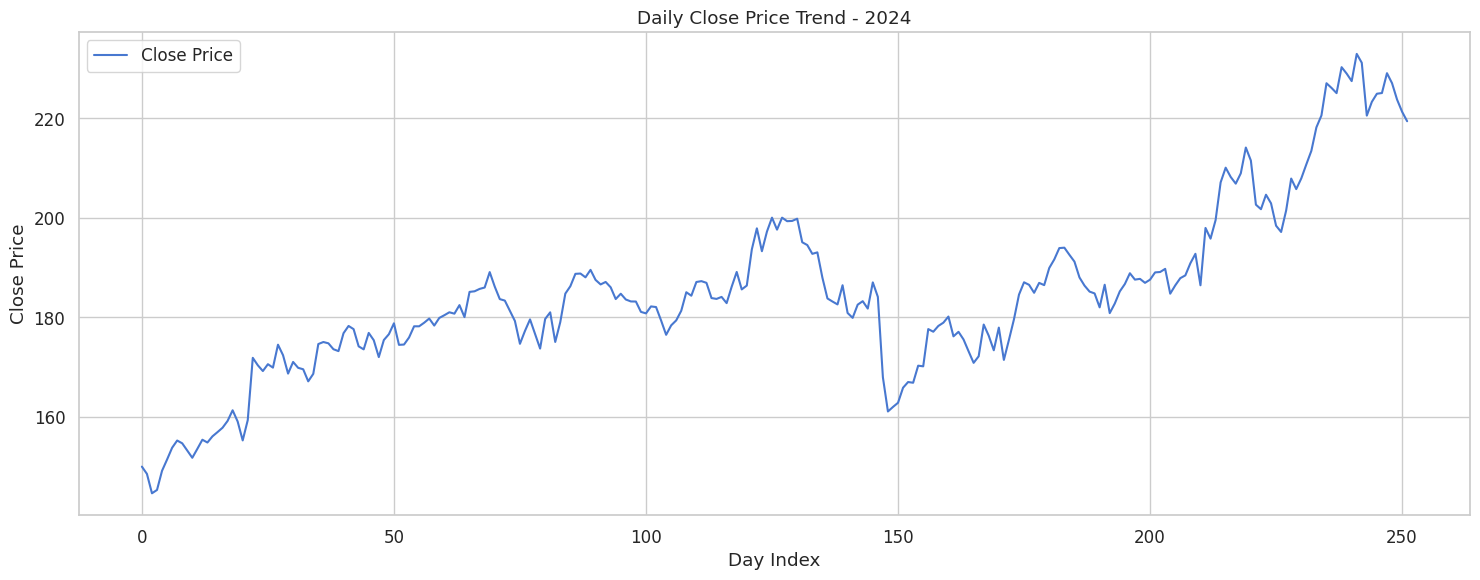

In [38]:
selected_year = 2024
df_year = df[df['year'] == selected_year]

plt.figure(figsize=(15,6))
plt.plot(df_year['Close'].reset_index(drop=True), label='Close Price')
plt.title(f"Daily Close Price Trend - {selected_year}")
plt.xlabel("Day Index")
plt.ylabel("Close Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
